# Steps in Machine Learning




### Introduction

In this tutorial we will cover the steps taken for training a standard machine learning algorithm. 

### Things covered in this tutorial

* Data preparation for training ML algorithms.
  * Data cleaning.
  * Data visualization.
  * Data augmentation.
* Splitting into train, validation and test splits.
* Training blackbox machine learning algorithms.
* Metrics to judge the performance of a ML model.


### Importing important packages first.

In [ ]:
# General libraries
import numpy as np
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting library
import seaborn as sns
sns.set()

# Pandas library to read CSV
from pandas import read_csv

# SMOTE algorithm that is used for removing class imbalance
# We use it here for generating synthetic data
from imblearn.over_sampling import SMOTE

# Splitting into train and test (and val too)
from sklearn.model_selection import train_test_split

# Perceptron classifier
from sklearn.linear_model import Perceptron

# Performing PCA
from sklearn.decomposition import PCA

# For loading different datasets
from sklearn import datasets

# Metrics used for measuring performance of classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Data Preparation in Machine Learning

In supervised machine learning, you  use data to teach automated systems how to make accurate decisions. ML algorithms are designed to discover patterns and associations in historical training data; they learn from that data and encode that learning into a model to accurately solve a task when given new data (test data). Training data, therefore, is fundamental in the pursuit of supervised machine learning. With high-quality data, subtle nuances and correlations can be accurately captured and high-fidelity predictive systems can be built. But if training data is of poor quality, the efforts of even the best ML algorithms may be rendered useless. Therefore, best efforts are made to clean the data as well as visualize it. Data cleaning leads to eliminating noisy data in the training dataset helping the model find the relevant patterns which can help solving a task. Visualization helps us in understanding the nature of our data and help in deciding the features to be selected and type of ML model that can be used. We can also augment the training data with synthetic samples in some cases. This leads to better training in some cases and is widely used for generalization. Below we see several data cleaning, visualization and augmentation techniques on different datasets. 

**Note: In this notebook, we have used datasets which has already been cleaned and are used as toy datasets. Similarly, the technqiues used in each step as shown in this notebook might not be the only technique! While the steps generally remains the same for any kind of ML training, the technqiues are largely dependent on the data.**




#### Data Cleaning

Let us load our first dataset. We load the iris dataset. The dataset has four dimensions. Information about the `sepal_length`, `sepal_width`, `petal_length` and `petal_width` are present along with class information in each sample. The dataset contains duplicate rows. We need to find and clean them.


In [ ]:
# Loading and displaying the first 10 entris of the dataset
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
iris = read_csv(path)
iris.head(10)

5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
5  4.6  3.4  1.4  0.3  Iris-setosa
6  5.0  3.4  1.5  0.2  Iris-setosa
7  4.4  2.9  1.4  0.2  Iris-setosa
8  4.9  3.1  1.5  0.1  Iris-setosa
9  5.4  3.7  1.5  0.2  Iris-setosa

Find the duplicate rows present in this dataset.

In [ ]:
# Calculate duplicates
dups = iris.duplicated()

# Report if there are any duplicates
if dups.any():
  print ("There are duplicates as follows: ")
  # List all duplicate rows
  print(iris[dups])

else:
  print ("There are no duplicates!")

There are duplicates as follows: 
     5.1  3.5  1.4  0.2     Iris-setosa
33   4.9  3.1  1.5  0.1     Iris-setosa
36   4.9  3.1  1.5  0.1     Iris-setosa
141  5.8  2.7  5.1  1.9  Iris-virginica


Removing all the duplicate rows from this dataset.

In [ ]:
# delete duplicate rows
iris.drop_duplicates(inplace=True)

# check for duplicates again!
dups = iris.duplicated()

# Report if there are any duplicates
if dups.any():
  print ("There are duplicates as follows: ")
  # List all duplicate rows
  print(iris[dups])

else:
  print ("There are no duplicates!")

There are no duplicates!


There can be several other types of data cleaning and preprocessing required for other datasets. We will have a look at those more closely in the advanced notebook where there are more real world data available.

#### Data Visualization



##### Plotting all feature pairs at once

Let us check the pair wise relation between the features along with their class information. This will help us understand how classifiers can be trained better. There will be some feature dimensions where the separation between two classes is better than the others. These plots aim to help us understand that. We thus plot all the pairs below. We also reload a version of data which is already cleaned.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


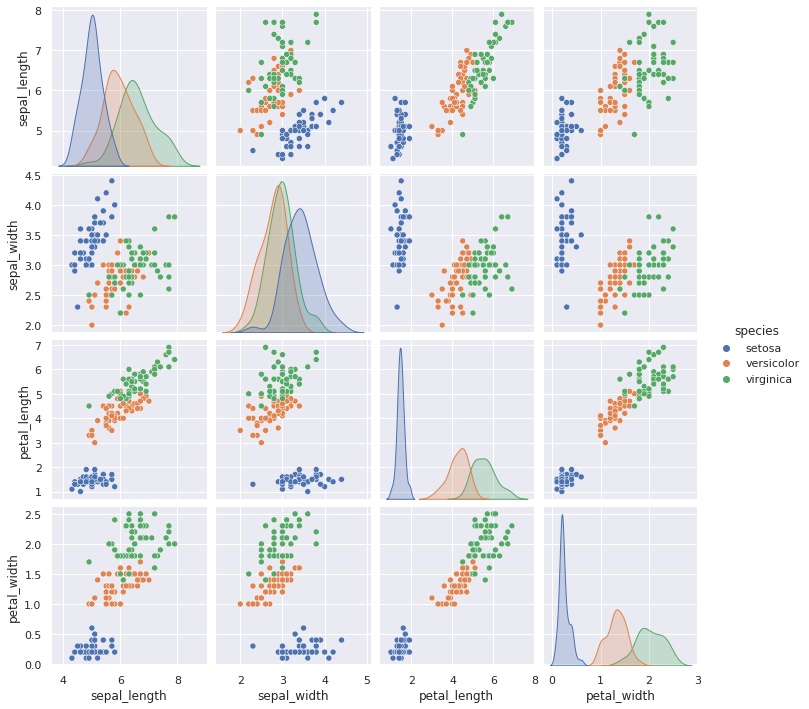

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', size=2.5);

##### Plotting one pair at a time

We can also plot two features at a time and check. The above graph showed all combinations while the below one shows the same thing one by one.

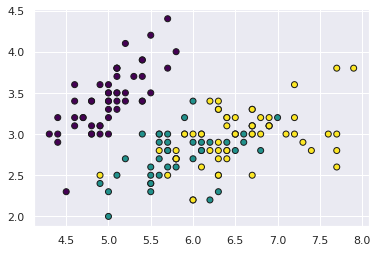

In [ ]:
# iris = datasets.load_iris()
iris = datasets.load_iris()
X = iris.data  
y = iris.target

# Please change feature_1 and feature_2 accordingly
# 0 -> sepal_length
# 1 -> sepal_width
# 2 -> petal_length
# 3 -> petal_width

feature_1 = 0 # sepal_length
feature_2 = 1 # sepal_width

# Plot the training points
plt.scatter(X[:, feature_1], X[:, feature_2], c=y, cmap="viridis", edgecolor="k")

Next, we see some more plots of the same iris dataset

##### Plotting the features in 3D

We can also plot the data in 3-dimension to see how the classes are separated when 3 features are selected. Please change the variables `feature_1`, `feature_2` and `feature_3` to check how different features affect the distributions.


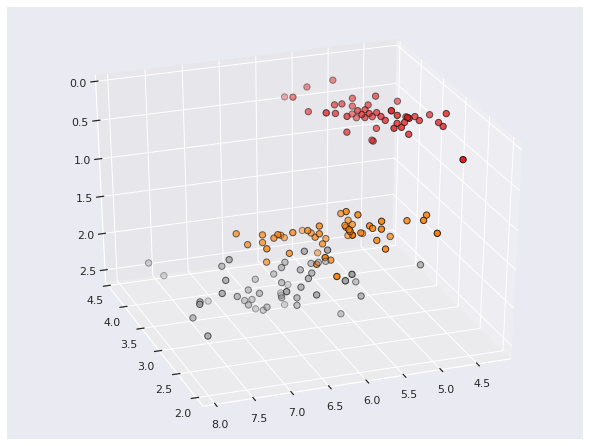

In [ ]:
# Please change feature_1, feature_2 and feature_3 accordingly
# 0 -> sepal_length
# 1 -> sepal_width
# 2 -> petal_length
# 3 -> petal_width

feature_1 = 0 # sepal_length
feature_2 = 1 # sepal_width
feature_3 = 3 # petal_width
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    X[:, feature_1],
    X[:, feature_2],
    X[:, feature_3],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
plt.show()

Instead of doing feature selection, we can also try out dimensionality reduction. One of the most popular ways to do this is using PCA. We will be covering the topic in detail in Week 4. For now, we show a simple example on how PCA can affect the data. We reduce the 4D data to 2D as well as 3D and then plot the result.

##### Plotting in 2D after doing PCA




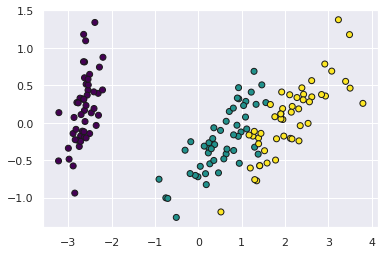

In [ ]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="viridis", edgecolor="k")

##### Plotting in 3D after doing PCA
We can use PCA to dimensionally reduce the 4D data to 3D. The resulting 3 dimensional data will have the highest varience along each of its axis. In this case, the data actually gets transformed and we don't have to select axis. Let us see, how it affects the data.

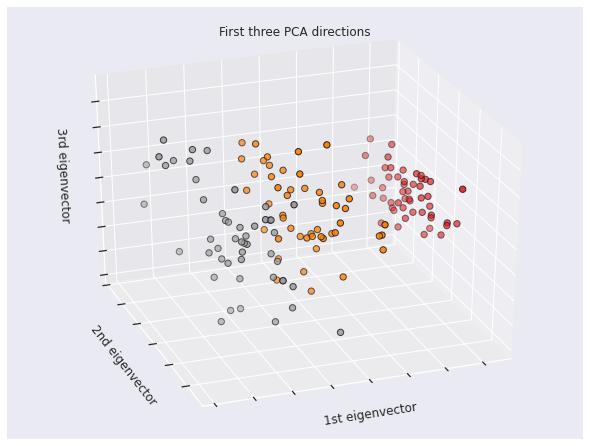

In [ ]:
# Declaring the figure
fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=110)

# Dimensionally reducing the data from 4D to 3D
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Plotting the data
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Data Augmentation

There can be various forms of data augmentation. One of the simplest one and something that is often used by tabular data is that SMOTE algorithm. SMOTE stands for Synthetic Minority Over-Sampling Technique. It can be used to reduce problems like class imbalance wherein the minority class in oversampled. 
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data. Now, our dataset does not have class imbalance. We want to repurpose SMOTE for generating synthetic data. Thus, we add a fake class with high number of examples and introduce class imbalance. We then use SMOTE to generate oversample all the real classes. Finally we remove the fake class data that we just generated. We check a code snippet for the same. We use the iris dataset for this and check the effect. 

Link to know more about SMOTE: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/#:~:text=SMOTE%20(synthetic%20minority%20oversampling%20technique)%20is%20one%20of%20the%20most,instances%20between%20existing%20minority%20instances.

In [ ]:
# Number of synthetic points that want to add is 1500
# X and y are given
def data_augment(X, y, num_points=1500):
  # Defining the SMOTE algorithm,
  sm = SMOTE(random_state=42, sampling_strategy="all")

  # Creating copy of the original data
  # Good to create and keep copies of variables to ensure they dont get overwritten
  X_1 = X.copy()
  y_1 = y.copy()

  # Creating fake data. We are adding 1500 additional points to the dataset.
  # We first create 1500 fake points first.
  # All the points have the value [1,1,1,1].
  # This way we will be able to remove these from the dataset later easily.
  # We also add a fake class for these points.
  fake_data, fake_y = np.ones((num_points, X_1.shape[1])), np.ones((num_points))*(max(y)+1)

  # Adding the fake points to the dataset
  X_1 = np.concatenate([X_1, fake_data], axis=0)
  y_1 = np.concatenate([y_1, fake_y], axis=0)


  # Augmenting the data
  # Since our fake class has 1500 samples!
  # SMOTE will create 1500 samples for all the other classes.
  X_augmented, y_augmented = sm.fit_resample(X_1, y_1)

  # Removing the fake class from the dataset now!
  X_augmented_final = []
  y_augmented_final = []

  for i, one_label in enumerate(y_augmented):
    if one_label == (max(y)+1):
      continue
    else:
      X_augmented_final.append(X_augmented[i])
      y_augmented_final.append(one_label)

  # Converting the list to numpy arrays
  X_augmented_final = np.array(X_augmented_final)
  y_augmented_final = np.array(y_augmented_final)

  return X_augmented_final, y_augmented_final

Let us now plot the original data again as well as the augmented data and check how the dataset was augmented.

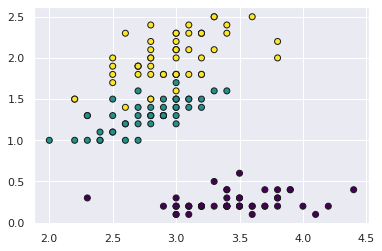

In [ ]:
# Original data
# Please change feature_1 and feature_2 accordingly
# 0 -> sepal_length
# 1 -> sepal_width
# 2 -> petal_length
# 3 -> petal_width

feature_1 = 1 # sepal_width
feature_2 = 3 # petal_width

# Plot the training points
plt.scatter(X[:, feature_1], X[:, feature_2], c=y, cmap="viridis", edgecolor="k")

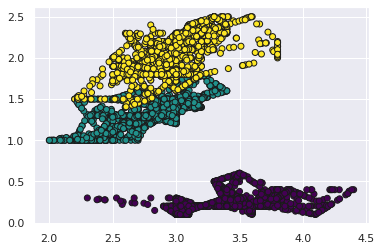

In [ ]:
# Augmented data
X_augmented_final, y_augmented_final = data_augment(X, y)
# Plot the training points
plt.scatter(X_augmented_final[:, feature_1], X_augmented_final[:, feature_2], c=y_augmented_final, cmap="viridis", edgecolor="k")

### Creating Training, Validation and Test Splits of the data.

While training any ML algorithm, we must first divide our data into train, test and validation sets. The motivation is quite simple: you should separate your data into train, validation, and test splits to prevent your model from overfitting and to accurately evaluate your model.

**Training Set**

The training set the largest corpus of your dataset that you reserve for training your model. After training, inference on these data points will be taken with a grain of salt, since the model has already had a chance to look at and memorize the correct output.

Generally, we allocate around $80\%$ of your dataset to the training set. 

**Validation Set**

The validation set is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on images that are not being used in training.

During training, it is common to report validation metrics continually after each training epoch such as validation mAP or validation loss. You use these metrics to get a sense of when your model has hit the best performance it can reach on your validation set. You may choose to cease training at this point, a process called "early stopping."

We generally have $10\%$ of dataset reserved for validation.

**Test Set**

After all of the training experiments have concluded, you probably have gotten a sense on how your model might do on the validation set. But it is important to remember that the validation set metrics may have influenced you during the creation of the model, and in this sense you might, as a designer, overfit the new model to the validation set.

Because the validation set is heavily used in model creation, it is important to hold back a completely separate stronghold of data - the test set. You can run evaluation metrics on the test set at the very end of your project, to get a sense of how well your model will do in production.  

We recommend allocating $10\%$ of your dataset to the test set.

Let us see how we create that in Python.

We will use the iris dataset for the same.


In [ ]:
# iris = datasets.load_iris()
iris = datasets.load_iris()
X = iris.data  
y = iris.target

# First we divide into two sets.
# Train and test-val
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2)

# Then we divide the test-val into test and validation again
# We give test_size=0.5 here because we have already divided the train and test-val into 80-20%.
# 20/2% = 10%
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

print ("The number of training examples: {}".format(len(X_train)))
print ("The number of testing examples: {}".format(len(X_test)))
print ("The number of validation examples: {}".format(len(X_val)))

The number of training examples: 120
The number of testing examples: 15
The number of validation examples: 15


If we want to augment data, we will augment only on the train set. We won't use the full dataset to augment data. Therefore, it is important to split the data first and then augment it if needed. We will do that to check how data augmentation affects performance. 

In [ ]:
# Augmenting the train set and keeping it ready for training
X_train_augmented, y_train_augmented = data_augment(X_train, y_train)

### Training a linear classifier
We will use a perceptron again for training a linear classifier on the iris dataset. We will be using the dataset that was prepared previously. Please consider the training algorithm to be black box. We can replace perceptron with any other algorithm like a SVM or a logistic regression while the rest of the process remains the same. Check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html to know more about the parameters. 

**Please also note that we are training our model with all the four features together**

In [ ]:
# Defining the perceptron algorithm
perceptron = Perceptron(random_state=42, max_iter=10000, tol=0.0001)

# Training the algorithm on the train data
perceptron.fit(X_train, y_train)

Perceptron(max_iter=10000, random_state=42, tol=0.0001)

Now let us check the performance of the model on the val set. We use accuracy as our metric to judge performance during training. Once we have achieved an accuracy which we are confident, we will use our test set to calculate the final accuracy and a few other metrics! Please keep running the above cell first with different parameters and check if the accuracy (by running the cell below) is changing or not. You can check with `max_iter=100, tol=1` to see the change.

In [ ]:
# Predicting the labels on the validation set
pred_labels_val = perceptron.predict(X_val)

# Calculating validation accuracy
acc_val = accuracy_score(y_val, pred_labels_val)
print ("Validation accuracy: ", acc_val)

Validation accuracy:  0.5333333333333333


We also check the performance on the validation set if we use the augmented data for training.

In [ ]:
# Defining the perceptron algorithm
perceptron_augmented = Perceptron(random_state=42, max_iter=10000, tol=0.0001)

# Training the algorithm on the train data
perceptron_augmented.fit(X_train_augmented, y_train_augmented)

# Predicting the labels on the validation set
pred_labels_val = perceptron_augmented.predict(X_val)

# Calculating validation accuracy
acc_val = accuracy_score(y_val, pred_labels_val)
print ("Validation accuracy: ", acc_val)

Validation accuracy:  0.6


### Measuring performance of a ML algorithm using Metrics
Once we are satisfied with the accuracy on the validation set, we will measure its performance on the test set. For real problems, the test set should not be used to tune the ML algorithm! However, since this a demo, please check how the val and test accuracy both change with improving the perceptron model. It should only be used at last. We will use a bunch of metrics for doing so. The metrics we use are purely used to measure classification performance. For regression, there will be other types of metrics. 

Let us first check the defination of the metrics once. Source: https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

**What is a confusion matrix?**

It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

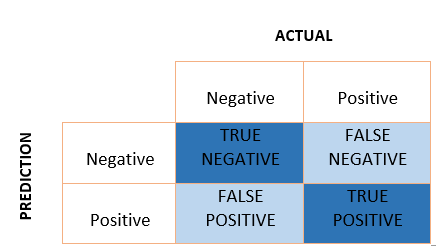

**Accuracy**

Accuracy = $\frac{(TP+TN)}{(TP+FP+FN+TN)}$

**Precision**

Precision = $\frac{TP}{(TP+FP)}$

**Recall**

Recall = $\frac{TP}{(TP+FN)}$

**F1-Score**

Accuracy = $\frac{2\times(precision \times recall)}{(precision + recall)}$

Let us now calculate these metrics on our test data. We have two separate model trained. One with the real train set and another with the augmented training set.

In [ ]:
# Predicting the labels on the test set
pred_labels_test = perceptron.predict(X_test)

# Calculating test accuracy
acc_test = accuracy_score(y_test, pred_labels_test)

# Calculating test precision
precision_test = precision_score(y_test, pred_labels_test, average="weighted")

# Calculating test recall
recall_test = recall_score(y_test, pred_labels_test, average="weighted")

# Calculating test F1
f1_test = f1_score(y_test, pred_labels_test, average="weighted")


print ("Test accuracy: ", acc_test)
print ("Test precision: ", precision_test)
print ("Test recall: ", recall_test)
print ("Test f1: ", f1_test)

Test accuracy:  0.4666666666666667
Test precision:  0.24444444444444444
Test recall:  0.4666666666666667
Test f1:  0.31333333333333335


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We also test the model trained on the augmented dataset.

In [ ]:
# Predicting the labels on the test set
pred_labels_test = perceptron_augmented.predict(X_test)

# Calculating test accuracy
acc_test = accuracy_score(y_test, pred_labels_test)

# Calculating test precision
precision_test = precision_score(y_test, pred_labels_test, average="weighted")

# Calculating test recall
recall_test = recall_score(y_test, pred_labels_test, average="weighted")

# Calculating test F1
f1_test = f1_score(y_test, pred_labels_test, average="weighted")


print ("Test accuracy: ", acc_test)
print ("Test precision: ", precision_test)
print ("Test recall: ", recall_test)
print ("Test f1: ", f1_test)

Test accuracy:  0.5333333333333333
Test precision:  0.7718518518518519
Test recall:  0.5333333333333333
Test f1:  0.43262108262108256


### Conclusion

In this tutorial we tried to cover the general steps that are taken for training a ML algorithm. We did not touch upon the training methods itself, but  tried to give an overview of the overall process. In the advanced notebook, we have added a more complex dataset (MNIST) and how it is generally handled. 

## Excercise

We used all the four features of the iris dataset to train the model. However, when you visualize, you may find different pairs of features which are more separable linearly. Can you repeat the training, validation and testing phases with different pairs of features? The below code snippet can form the feature pairs.

Can you correlate with the visualizations? Does the accuracy change based on the two features you select.

In [ ]:
# Please change feature_1 and feature_2 accordingly
# 0 -> sepal_length
# 1 -> sepal_width
# 2 -> petal_length
# 3 -> petal_width

feature_1 = 0 # sepal_length
feature_2 = 1 # sepal_width

X_s1 = X[:, feature_1]
X_s2 = X[:, feature_2]

X_s1 = np.expand_dims(X_s1, axis=1)
X_s2 = np.expand_dims(X_s2, axis=1)

# This contains the selected features!
# The labels y remains the same!
X_selectedfeatures = np.concatenate([X_s1, X_s2], axis=1)


print ("Shape of the data: ", X_selectedfeatures.shape)

Shape of the data:  (150, 2)


Perform all the steps that we discussed in this tutorial on different pairs of features. You may also extend the code to take 3 features at a time or use PCA outputs!